In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the XOR data and labels
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([0, 1, 1, 0], dtype=torch.float)

In [3]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear1 = nn.Linear(2, 5)  # First linear layer
        self.activation = nn.Identity()
        # self.activation = nn.Tanh()
        self.linear2 = nn.Linear(5, 1)  # Second linear layer

    def forward(self, x):
        out = self.linear1(x)
        out = self.activation(out)
        out = self.linear2(out)
        return out

In [4]:
# Model, Loss and Optimizer
model = LinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training
for epoch in range(3000):
    output = model(X).reshape(-1)
    loss = criterion(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 300 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')


Epoch 300, Loss: 0.2551
Epoch 600, Loss: 0.2504
Epoch 900, Loss: 0.2500
Epoch 1200, Loss: 0.2500
Epoch 1500, Loss: 0.2500
Epoch 1800, Loss: 0.2500
Epoch 2100, Loss: 0.2500
Epoch 2400, Loss: 0.2500
Epoch 2700, Loss: 0.2500
Epoch 3000, Loss: 0.2500


In [5]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    spacing = min(x_max - x_min, y_max - y_min) / 100
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                         np.arange(y_min, y_max, spacing))
    data = np.hstack((XX.ravel().reshape(-1,1),
                      YY.ravel().reshape(-1,1)))
    # Forward pass
    db_data = torch.Tensor(data)
    with torch.no_grad():
        db_out = model(db_data)
    Z = db_out.reshape(XX.shape).detach().numpy()
    plt.figure(figsize=(10,8))
    plt.contourf(XX, YY, Z > 0.5, levels=1, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50)
    plt.title("Decision Boundary")
    plt.show()

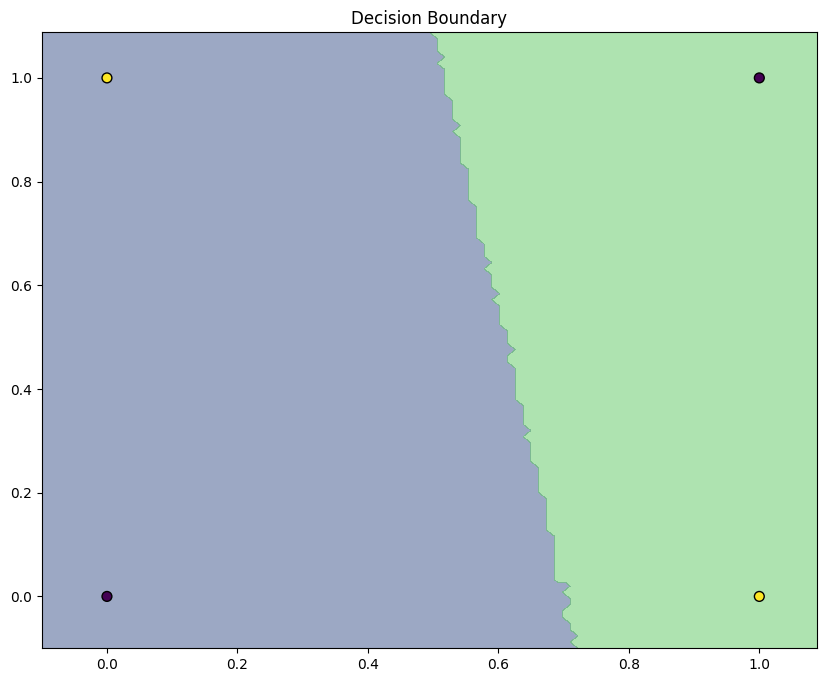

In [6]:
plot_decision_boundary(model, X.numpy(), y.numpy())